In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
name="tips"
data = sns.load_dataset(name)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.shape

(244, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
data.select_dtypes( include='category')

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [8]:
for col in data.select_dtypes( include="category").columns:
    print(col, "=",data[col].unique())
    print()

sex = ['Female', 'Male']
Categories (2, object): ['Male', 'Female']

smoker = ['No', 'Yes']
Categories (2, object): ['Yes', 'No']

day = ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

time = ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']



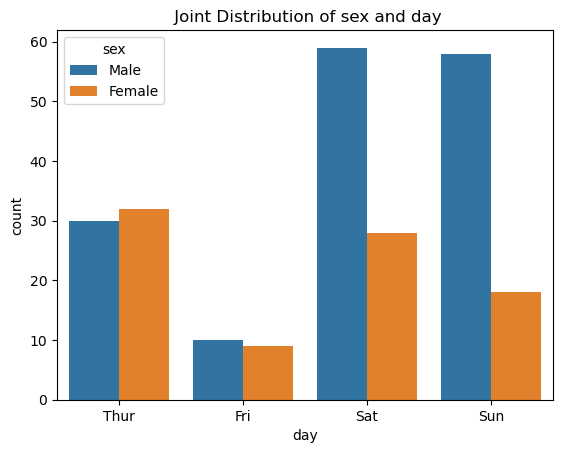

In [10]:
sns.countplot( x="day", hue = "sex", data=data)
plt.title("Joint Distribution of sex and day")
plt.show()

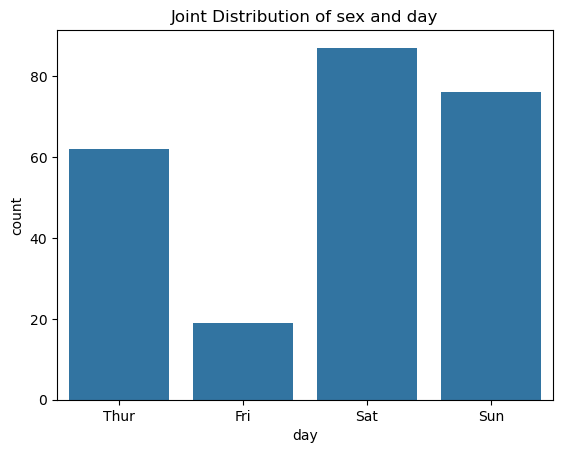

In [11]:
sns.countplot( x="day", data=data)
plt.title("Joint Distribution of sex and day")
plt.show()

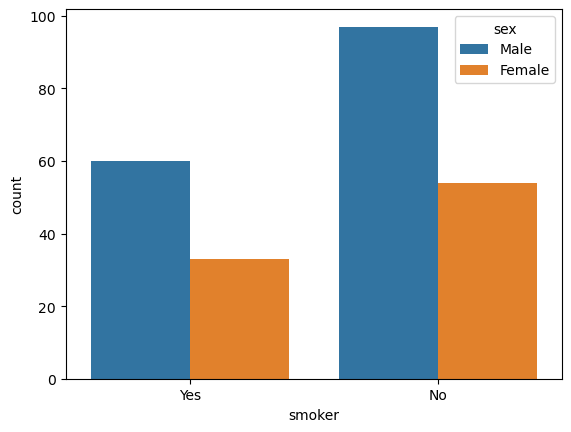

In [12]:
sns.countplot(x=data.smoker, data=data, hue='sex')
plt.show()

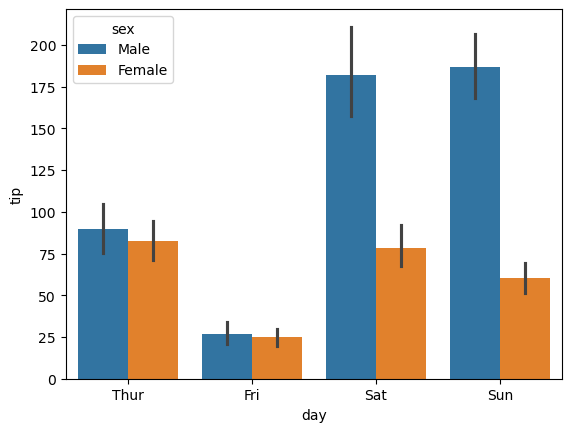

In [13]:
sns.barplot(x="day", y="tip", hue="sex", data=data, estimator=sum)
plt.show()

In [11]:
data.groupby('day')['tip'].sum()

C:\Users\rujul\AppData\Local\Temp\ipykernel_11060\2830072015.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('day')['tip'].sum()


day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [23]:
data.groupby('sex')['tip'].mean()

C:\Users\rujul\AppData\Local\Temp\ipykernel_11060\3376031547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('sex')['tip'].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

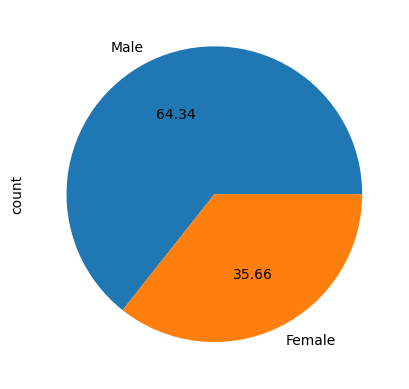

In [12]:
data['sex'].value_counts().plot(kind = "pie", autopct = "%.2f")
plt.show()

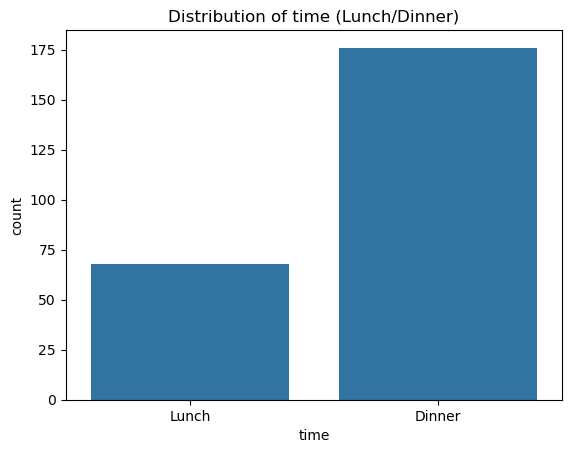

In [9]:
sns.countplot( x='time', data=data)
plt.title( 'Distribution of time (Lunch/Dinner)')
plt.show()

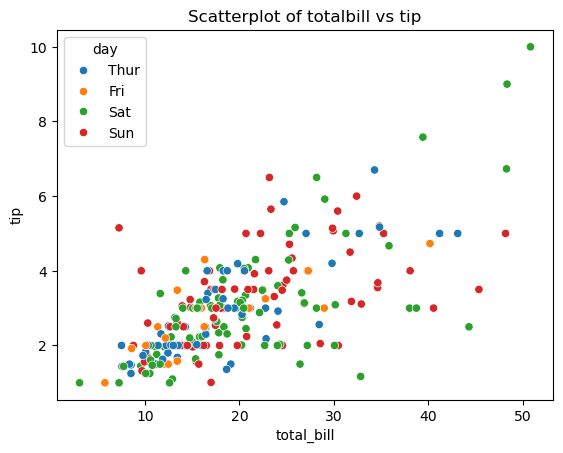

In [10]:
sns.scatterplot( x='total_bill', y="tip", data=data, hue="day")
plt.title('Scatterplot of totalbill vs tip')
plt.show()

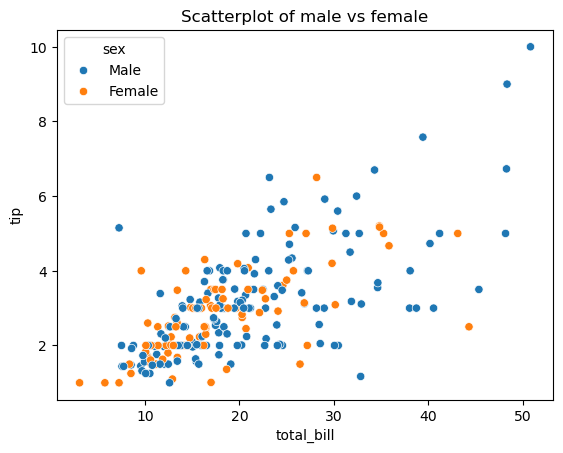

In [13]:
sns.scatterplot( x='total_bill', y='tip', data=data, hue='sex')
plt.title("Scatterplot of male vs female")
plt.show()

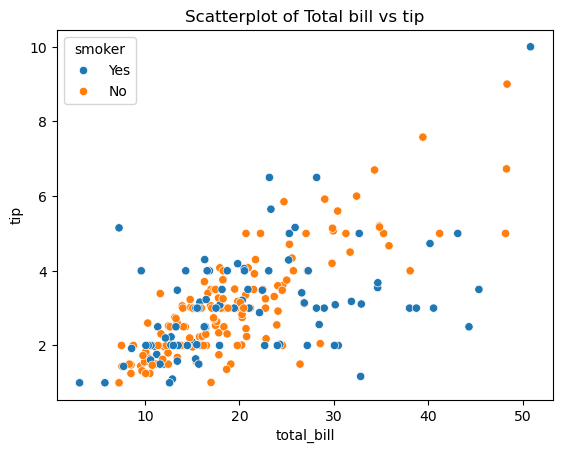

In [16]:
sns.scatterplot( x='total_bill', y='tip', data=data, hue='smoker')
plt.title("Scatterplot of Total bill vs tip")
plt.show()

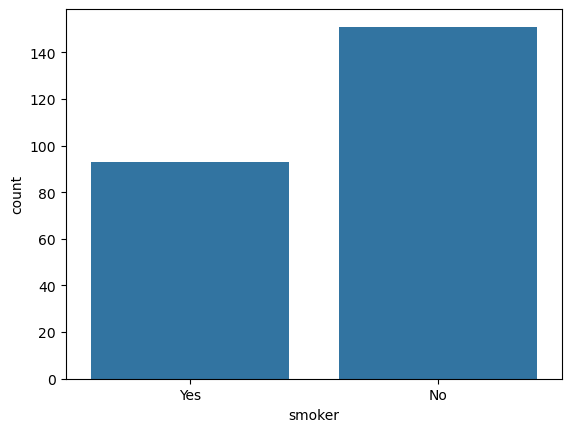

In [17]:
sns.countplot( x=data.smoker, data=data)
plt.show()

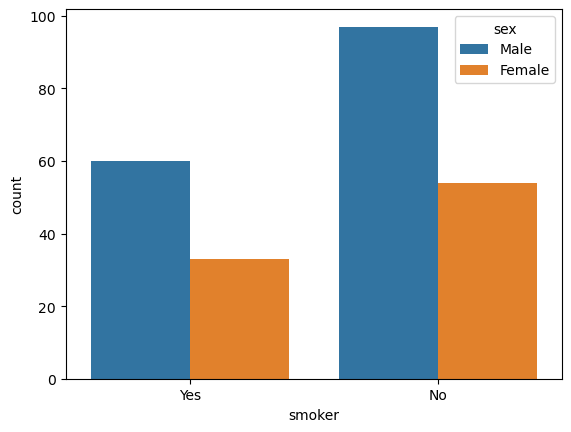

In [18]:
sns.countplot( x=data.smoker, data=data, hue="sex")
plt.show()

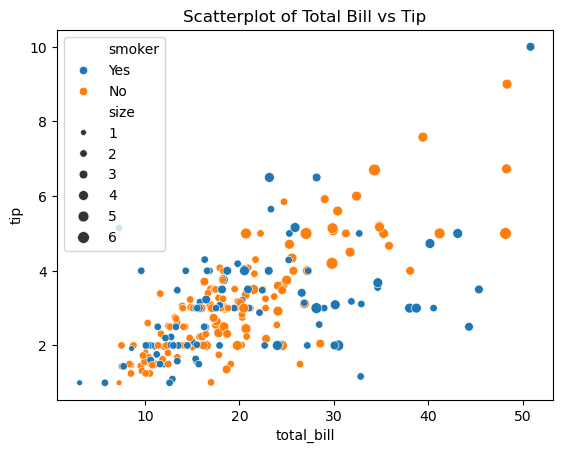

In [19]:
sns.scatterplot( x="total_bill", y="tip", data=data, hue="smoker", size="size")
plt.title("Scatterplot of Total Bill vs Tip")
plt.show()

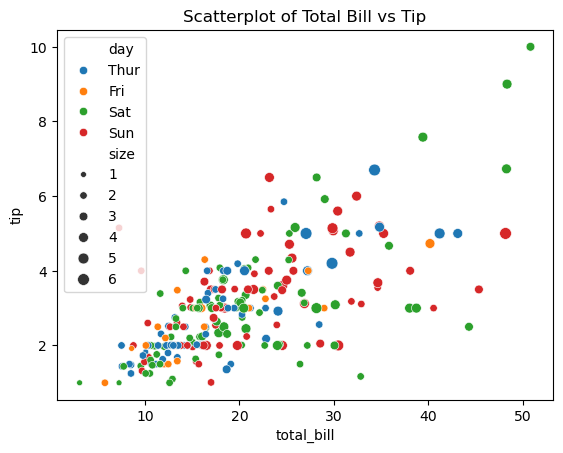

In [20]:
sns.scatterplot( x="total_bill", y="tip", data=data, hue="day", size="size")
plt.title("Scatterplot of Total Bill vs Tip")
plt.show()

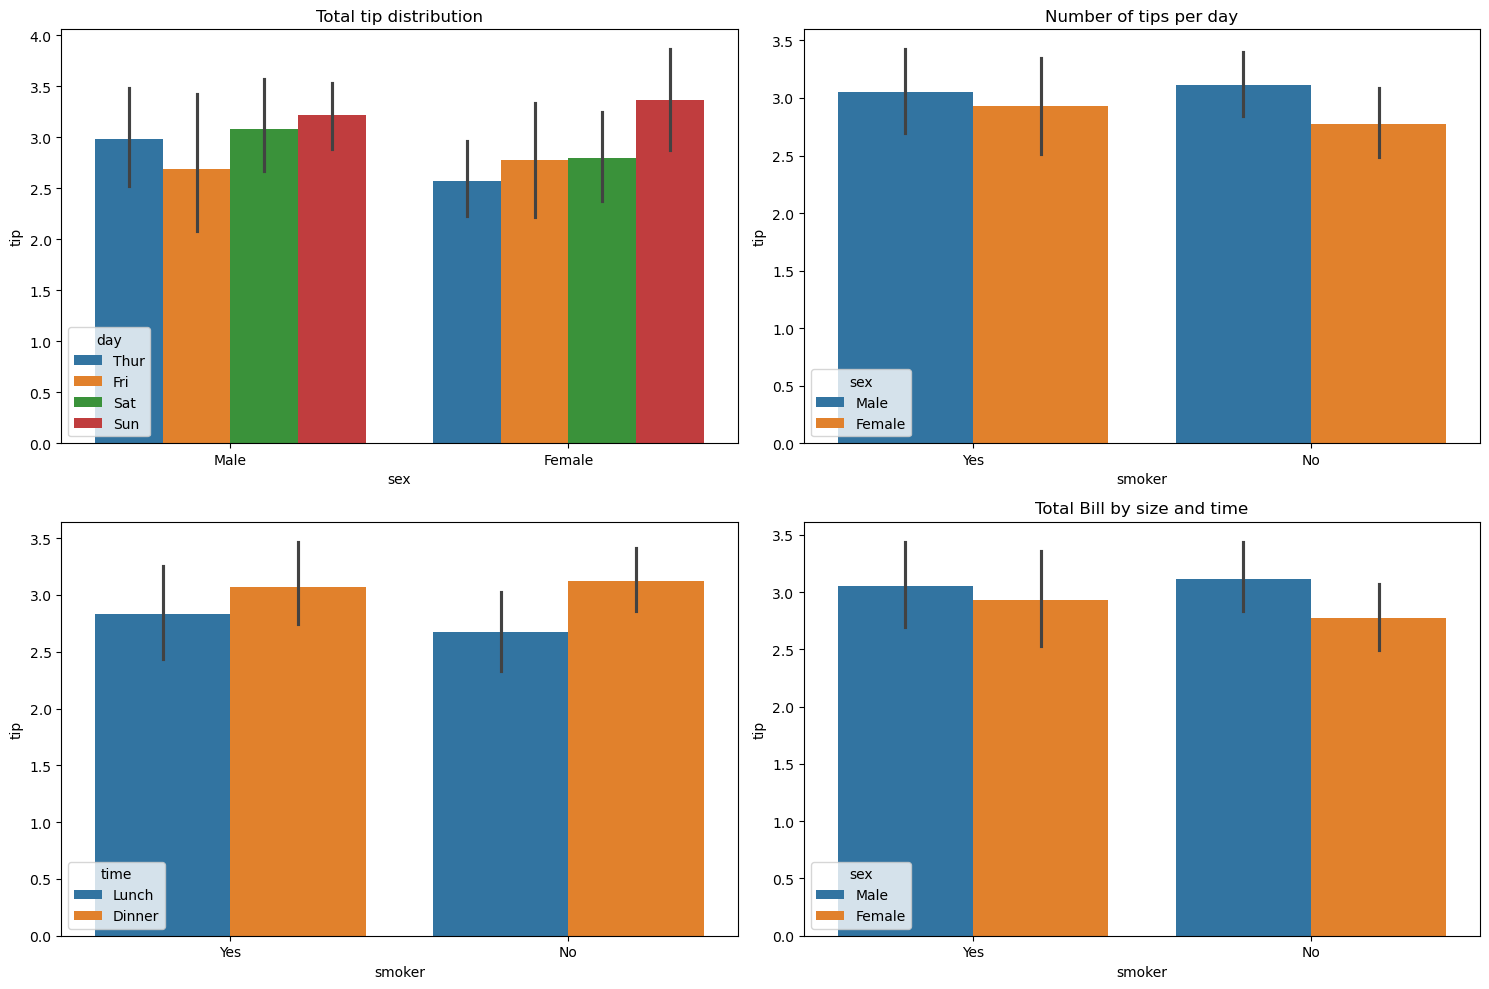

In [22]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))

sns.barplot( x="sex", y="tip", data=data, hue="day", ax=axes[0,0])
axes[0,0].set_title('Total tip distribution')

sns.barplot( x="smoker", y="tip", data=data, hue="sex", ax=axes[0,1])
axes[0,1].set_title('Number of tips per day')

sns.barplot( x="smoker", y="tip", data=data, hue="sex", ax=axes[1,1])
axes[1,1].set_title('Tip vs total bill')

sns.barplot( x="smoker", y="tip", data=data, hue="time", ax=axes[1,0])
axes[1,1].set_title('Total Bill by size and time')

plt.tight_layout()
plt.show()

In [24]:
data.groupby('size')['tip'].sum()

size
1      5.75
2    402.84
3    128.94
4    153.01
5     20.14
6     20.90
Name: tip, dtype: float64

<Axes: xlabel='size'>

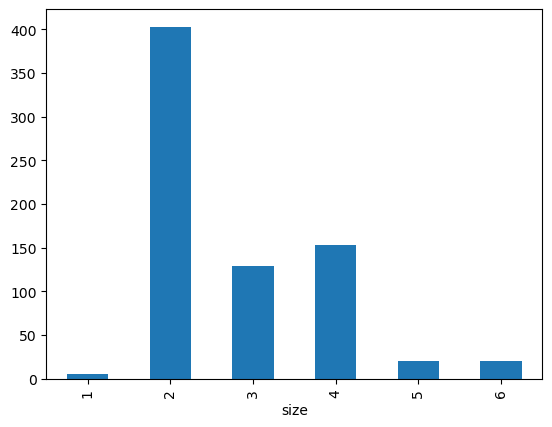

In [26]:
data.groupby('size')['tip'].sum().plot(kind="bar")

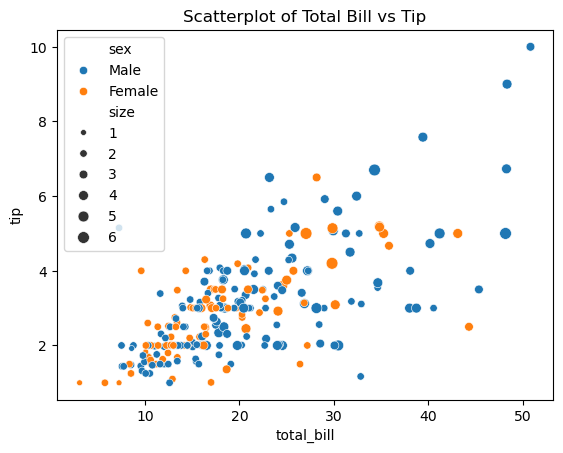

In [27]:
sns.scatterplot( x="total_bill", y="tip", data=data, hue="sex", size="size")
plt.title("Scatterplot of Total Bill vs Tip")
plt.show()

<Axes: >

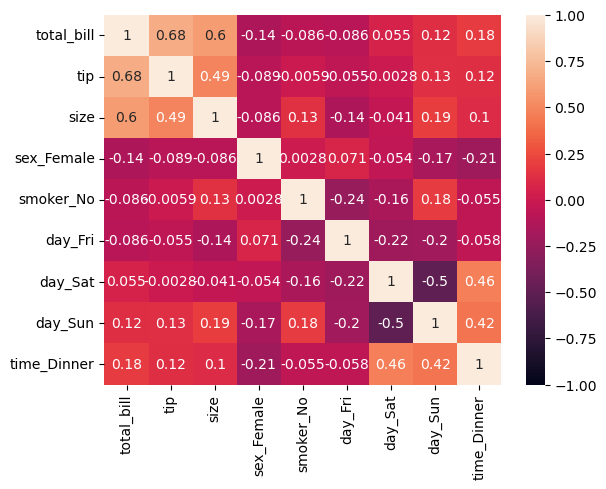

In [29]:
sns.heatmap(pd.get_dummies (data, dtype=int, drop_first=True).corr(),annot=True,vmin=-1)



 Pairplot showing relationship between total bill, tip and size by sex of the bill payer 



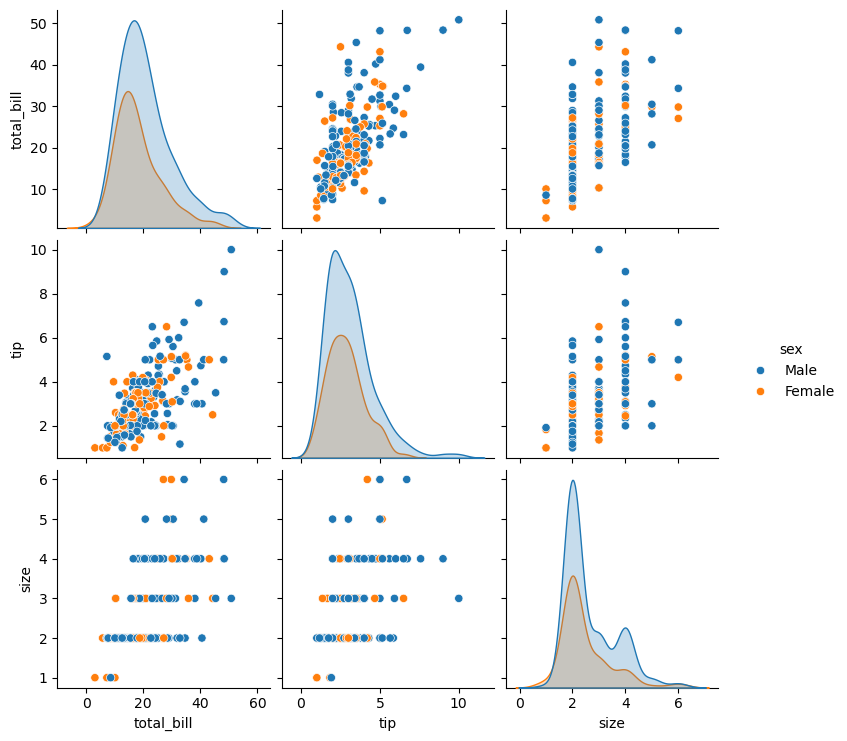

In [31]:
data.loc[:, ['total_bill', 'tip', 'sex', 'smoker', 'size']];
print("\n\n Pairplot showing relationship between total bill, tip and size by sex of the bill payer \n")
sns.pairplot( data.loc[:, ['total_bill', 'tip', 'sex','smoker','size']], hue='sex')

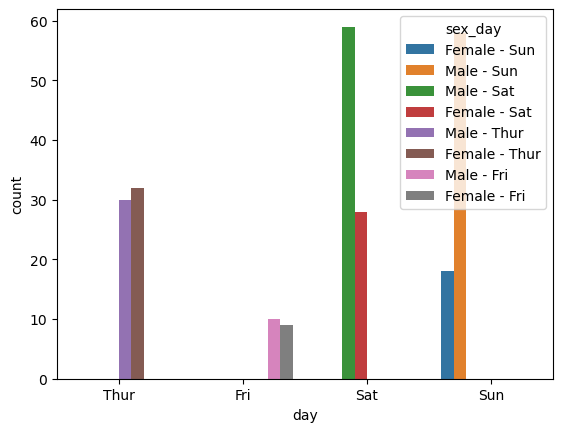

In [32]:
data ['sex_day'] = data['sex'].astype(str) + " - " + data['day'].astype(str)
sns.countplot (x='day', hue='sex_day', data=data)
plt.show()

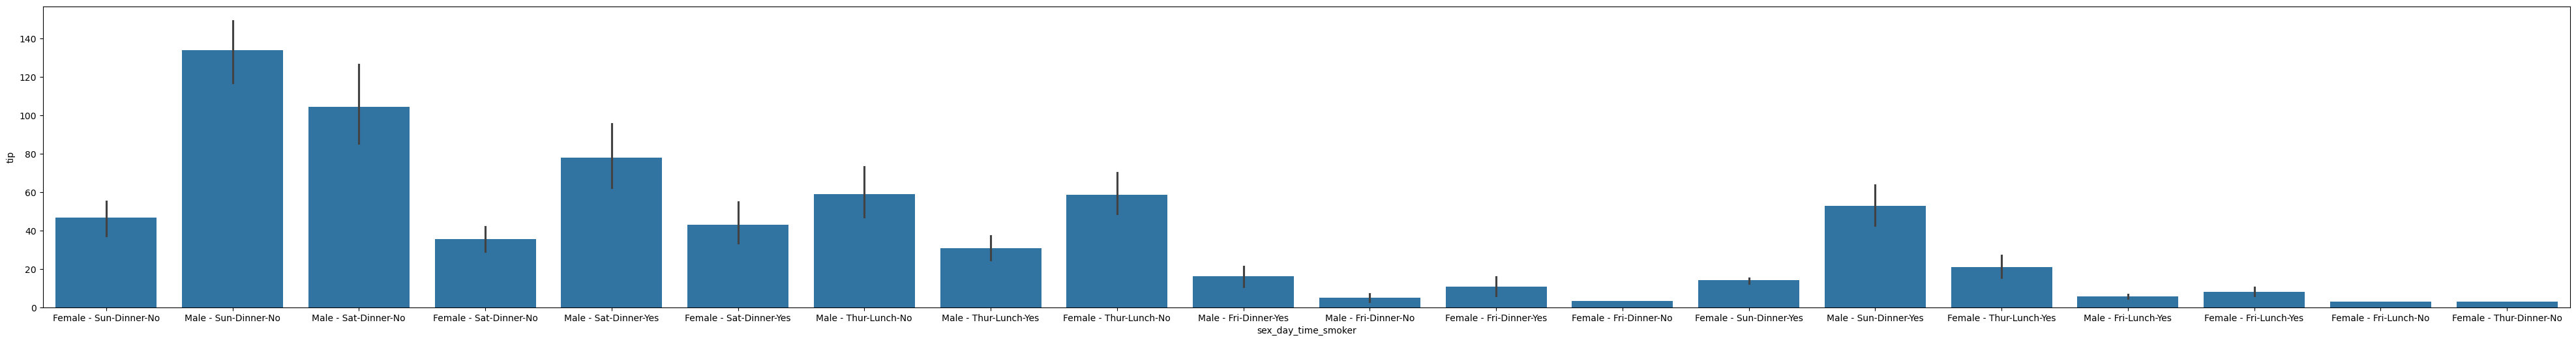

In [33]:
plt.figure(figsize=(50, 6))
data['sex_day_time_smoker'] = data['sex'].astype(str) + " - " + data['day'].astype(str)+"-"+data['time'].astype(str) + "-" + data['smoker'].astype(str)
sns.barplot( x='sex_day_time_smoker', y="tip", data=data, estimator=sum)
plt.show()

In [34]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,sex_day,sex_day_time_smoker
0,16.99,1.01,Female,No,Sun,Dinner,2,Female - Sun,Female - Sun-Dinner-No
1,10.34,1.66,Male,No,Sun,Dinner,3,Male - Sun,Male - Sun-Dinner-No
2,21.01,3.50,Male,No,Sun,Dinner,3,Male - Sun,Male - Sun-Dinner-No
3,23.68,3.31,Male,No,Sun,Dinner,2,Male - Sun,Male - Sun-Dinner-No
4,24.59,3.61,Female,No,Sun,Dinner,4,Female - Sun,Female - Sun-Dinner-No
